In [5]:
% matplotlib inline
import pandas as pd
import numpy as np

In [6]:
df = train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Describe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
df.describe()

/Users/oduvan/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### How much missed data do we have?

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Visualisation

In [57]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.mpl_style = 'default'

/Users/oduvan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


Let's visualise only nonmissed data first (except cabin, we have too many missed cabins)

In [58]:
df = train_df[(~train_df.Age.isnull()) & (~train_df.Embarked.isnull())].drop(['Cabin', 'PassengerId'], axis=1)
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [59]:
df.Name.count()

712

... and encode some labels

In [60]:
from sklearn.preprocessing import LabelEncoder
LABES_FOR_ENCODING = ['Sex', 'Embarked']

for column in LABES_FOR_ENCODING:
    df[column] = LabelEncoder().fit_transform(df[column])

df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122877240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122ef4400>]], dtype=object)

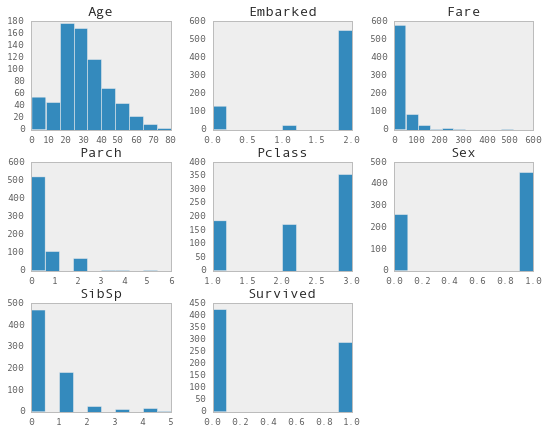

In [61]:
df.hist(bins=10,figsize=(9,7),grid=False)

In [75]:
np.absolute(df.corr())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,0.356462,0.536762,0.082446,0.015523,0.095265,0.266100,0.181979
Pclass,0.356462,1.000000,0.150826,0.365902,0.065187,0.023666,0.552893,0.244145
Sex,0.536762,0.150826,1.000000,0.099037,0.106296,0.249543,0.182457,0.109639
Age,0.082446,0.365902,0.099037,1.000000,0.307351,0.187896,0.093143,0.032565
SibSp,0.015523,0.065187,0.106296,0.307351,1.000000,0.383338,0.139860,0.033064
Parch,0.095265,0.023666,0.249543,0.187896,0.383338,1.000000,0.206624,0.011803
Fare,0.266100,0.552893,0.182457,0.093143,0.139860,0.206624,1.000000,0.283510
Embarked,0.181979,0.244145,0.109639,0.032565,0.033064,0.011803,0.283510,1.000000


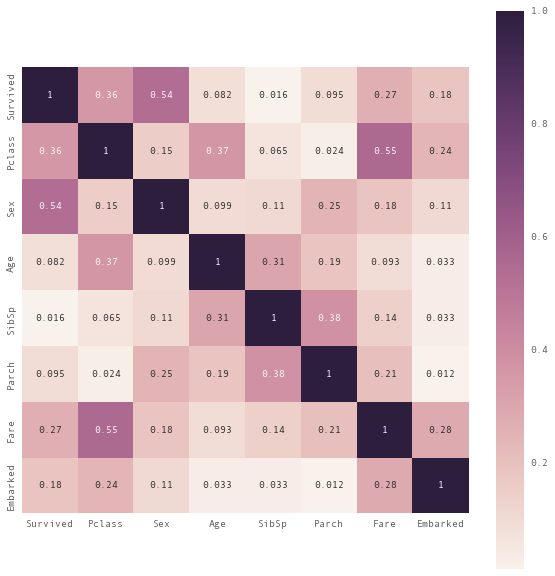

In [76]:
corr = np.absolute(df.corr())
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, square=True)

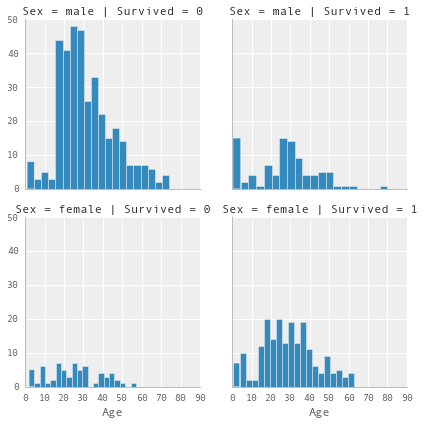

In [16]:
df = train_df[~train_df.Age.isnull()]
sns.FacetGrid(train_df, "Sex", "Survived").map(plt.hist, "Age", bins=20)

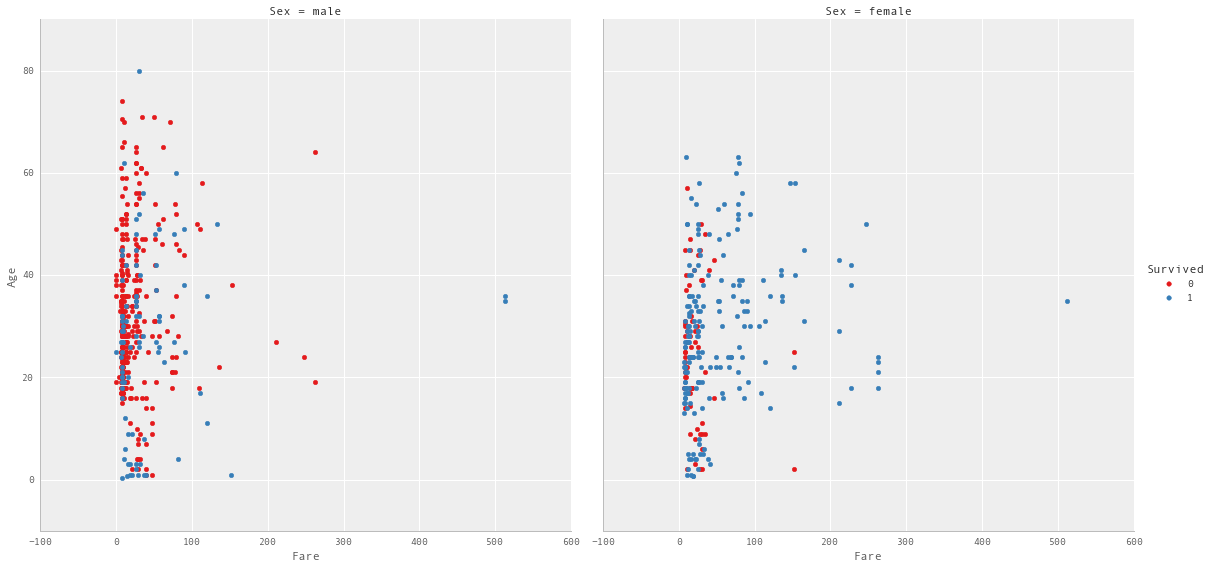

In [24]:
sns.FacetGrid(df, hue="Survived", col="Sex", size=8, palette="Set1").map(plt.scatter, "Fare", "Age").add_legend()

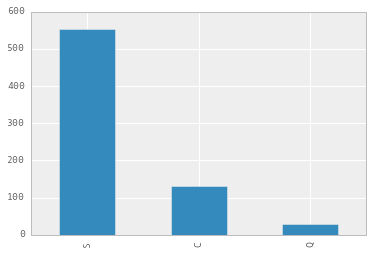

In [26]:
df.Embarked.value_counts().plot(kind="bar")

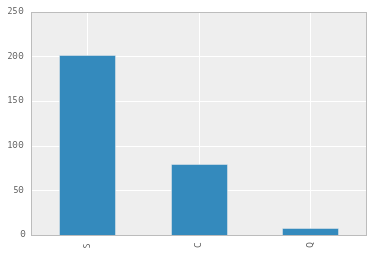

In [28]:
df[df.Survived==1].Embarked.value_counts().plot(kind="bar")

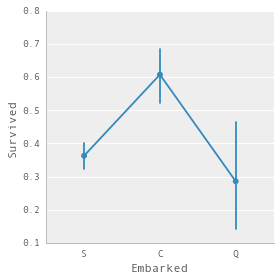

In [27]:
sns.factorplot(x="Embarked", y="Survived", data=df)

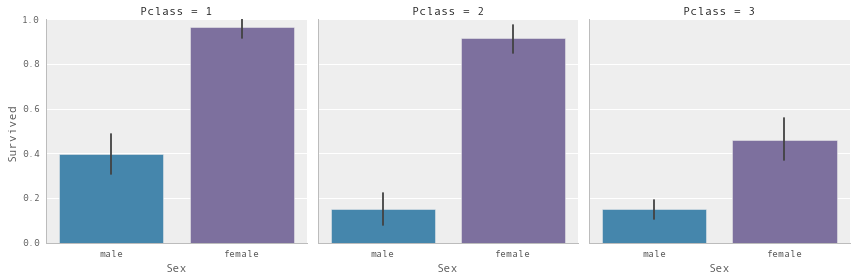

In [33]:
sns.factorplot(data=df, x="Sex", y="Survived", col="Pclass", kind="bar")

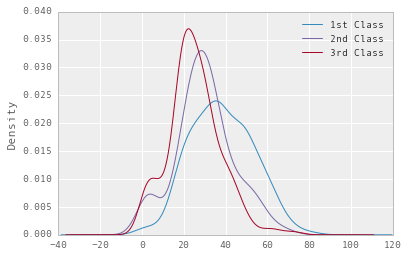

In [53]:
df.Age[df.Pclass==1].plot(kind="density")
df.Age[df.Pclass==2].plot(kind="density")
df.Age[df.Pclass==3].plot(kind="density")
plt.legend(('1st Class', '2nd Class', '3rd Class'))

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [56]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029340,-0.035349,0.036847,-0.082398,-0.011617,0.009592
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.035349,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.082398,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
Parch,-0.011617,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
Fare,0.009592,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000
